In [1]:
# Thêm autoreload vào để tự động reload lại module nếu có thay đổi code trong module
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Các model scikit learn cho bài toán phân loại
from sklearn.svm import SVC # Support vector machine
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

import os, sys
sys.path.append(os.path.abspath(".."))
from utils.common import load_model, save_model

### 1. Các thông tin về dữ liệu

In [2]:
train_df = pd.read_csv("train_clean.csv")

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802 entries, 0 to 801
Data columns (total 40 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   label               802 non-null    object 
 1   nose_x              802 non-null    float64
 2   nose_y              802 non-null    float64
 3   nose_z              802 non-null    float64
 4   left_shoulder_x     802 non-null    float64
 5   left_shoulder_y     802 non-null    float64
 6   left_shoulder_z     802 non-null    float64
 7   right_shoulder_x    802 non-null    float64
 8   right_shoulder_y    802 non-null    float64
 9   right_shoulder_z    802 non-null    float64
 10  left_hip_x          802 non-null    float64
 11  left_hip_y          802 non-null    float64
 12  left_hip_z          802 non-null    float64
 13  right_hip_x         802 non-null    float64
 14  right_hip_y         802 non-null    float64
 15  right_hip_z         802 non-null    float64
 16  left_kne

In [4]:
train_df.columns

Index(['label', 'nose_x', 'nose_y', 'nose_z', 'left_shoulder_x',
       'left_shoulder_y', 'left_shoulder_z', 'right_shoulder_x',
       'right_shoulder_y', 'right_shoulder_z', 'left_hip_x', 'left_hip_y',
       'left_hip_z', 'right_hip_x', 'right_hip_y', 'right_hip_z',
       'left_knee_x', 'left_knee_y', 'left_knee_z', 'right_knee_x',
       'right_knee_y', 'right_knee_z', 'left_ankle_x', 'left_ankle_y',
       'left_ankle_z', 'right_ankle_x', 'right_ankle_y', 'right_ankle_z',
       'left_heel_x', 'left_heel_y', 'left_heel_z', 'right_heel_x',
       'right_heel_y', 'right_heel_z', 'left_foot_index_x',
       'left_foot_index_y', 'left_foot_index_z', 'right_foot_index_x',
       'right_foot_index_y', 'right_foot_index_z'],
      dtype='object')

In [5]:
train_df.head()

,label,nose_x,nose_y,nose_z,left_shoulder_x,left_shoulder_y,left_shoulder_z,right_shoulder_x,right_shoulder_y,right_shoulder_z,...,left_heel_z,right_heel_x,right_heel_y,right_heel_z,left_foot_index_x,left_foot_index_y,left_foot_index_z,right_foot_index_x,right_foot_index_y,right_foot_index_z
0,D,-0.045332,-0.312278,0.025817,-0.003468,-0.236481,-0.137639,-0.004457,-0.237314,0.206035,...,0.029322,0.153061,0.134413,0.058777,-0.116457,0.233184,0.018748,0.134836,0.208726,0.050868
1,D,-0.036876,-0.316079,0.025362,0.002906,-0.249338,-0.161753,0.003340,-0.246322,0.212587,...,-0.180082,-0.070181,0.250603,0.154884,0.111356,0.274413,-0.231801,-0.121906,0.248574,0.139393
2,D,-0.042562,-0.311502,-0.002624,-0.000249,-0.237705,-0.156688,0.003185,-0.235856,0.168590,...,-0.050998,0.025495,0.195137,0.079456,0.044727,0.245372,-0.071741,0.005740,0.234293,0.069344
3,D,-0.043028,-0.309828,-0.012327,-0.003478,-0.232540,-0.164551,-0.006258,-0.231792,0.172023,...,-0.007732,0.168087,0.131500,0.049326,-0.100497,0.227354,-0.007181,0.144870,0.205615,0.041901
4,D,-0.035741,-0.315002,0.014858,0.005436,-0.248575,-0.154430,0.002749,-0.244614,0.200926,...,-0.049212,0.066569,0.230884,0.072321,-0.079495,0.282712,-0.086518,0.044977,0.273339,0.059026


### 2. Training model

In [6]:
# Chuyển dữ liệu của label về dạng số
from sklearn.preprocessing import LabelEncoder

# Khởi tạo LabelEncoder
label_encoder = LabelEncoder()

"""
0 -> D(down)
1 -> M(middle)
2 -> S(stand)
"""
train_df["label"] = label_encoder.fit_transform(train_df["label"])

In [7]:
# Extract features
X = train_df.drop(columns="label")
y = train_df["label"]

In [8]:
X.head()

,nose_x,nose_y,nose_z,left_shoulder_x,left_shoulder_y,left_shoulder_z,right_shoulder_x,right_shoulder_y,right_shoulder_z,left_hip_x,...,left_heel_z,right_heel_x,right_heel_y,right_heel_z,left_foot_index_x,left_foot_index_y,left_foot_index_z,right_foot_index_x,right_foot_index_y,right_foot_index_z
0,-0.045332,-0.312278,0.025817,-0.003468,-0.236481,-0.137639,-0.004457,-0.237314,0.206035,-0.002482,...,0.029322,0.153061,0.134413,0.058777,-0.116457,0.233184,0.018748,0.134836,0.208726,0.050868
1,-0.036876,-0.316079,0.025362,0.002906,-0.249338,-0.161753,0.003340,-0.246322,0.212587,0.000023,...,-0.180082,-0.070181,0.250603,0.154884,0.111356,0.274413,-0.231801,-0.121906,0.248574,0.139393
2,-0.042562,-0.311502,-0.002624,-0.000249,-0.237705,-0.156688,0.003185,-0.235856,0.168590,-0.002056,...,-0.050998,0.025495,0.195137,0.079456,0.044727,0.245372,-0.071741,0.005740,0.234293,0.069344
3,-0.043028,-0.309828,-0.012327,-0.003478,-0.232540,-0.164551,-0.006258,-0.231792,0.172023,-0.002649,...,-0.007732,0.168087,0.131500,0.049326,-0.100497,0.227354,-0.007181,0.144870,0.205615,0.041901
4,-0.035741,-0.315002,0.014858,0.005436,-0.248575,-0.154430,0.002749,-0.244614,0.200926,-0.000541,...,-0.049212,0.066569,0.230884,0.072321,-0.079495,0.282712,-0.086518,0.044977,0.273339,0.059026


In [9]:
y

0      0
1      0
2      0
3      0
4      0
      ..
797    2
798    2
799    2
800    2
801    2
Name: label, Length: 802, dtype: int32

In [10]:
# Phân chia dữ liệu thành tập huấn luyện và tập validation
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.15, random_state=42)

In [13]:
X_train.shape, X_validation.shape

((681, 39), (121, 39))

In [14]:
# Chuẩn hoá dữ liệu trên tập huấn luyện bằng z-scores
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)

In [15]:
# X lúc này là một DataFrame mới với các cột mới được đánh số từ 0 đến n-1, trong đó n là số lượng cột trong dữ liệu ban đầu
X_train

array([[ 0.13613612,  1.30498118, -1.48350681, ..., -0.14998849,
        -1.36796795,  1.96943149],
       [ 1.5405208 ,  0.82559754, -0.44481694, ...,  1.74598263,
        -0.91567505, -0.85718362],
       [ 0.36259052,  1.02001752, -0.52816813, ..., -0.27496658,
        -1.66744044,  1.81744005],
       ...,
       [-0.96536677, -0.71507987,  0.80641971, ...,  0.7465042 ,
         0.26573793,  0.0579231 ],
       [-0.32059651,  1.37813214, -0.76974521, ..., -0.01338629,
        -0.91842641,  0.62781636],
       [-1.81088148, -1.10488642,  0.90227219, ..., -1.16000233,
        -0.38863056,  0.68101675]])

In [16]:
from sklearn.metrics import (
    precision_score,
    accuracy_score,
    f1_score,
    recall_score,
    confusion_matrix,
)

import warnings

warnings.filterwarnings("ignore")

In [17]:
def round_up_metric_results(results) -> list:
    """Thực hiện việc làm tròn các giá trị trong mảng"""
    return list(map(lambda el: round(el, 3), results))

In [18]:
def evaluate_model(name, model, final_results):
    # Đánh giá Model
    y_validation_pred = model.predict(X_validation)

    # Do các số lượng mẫu theo từng nhãn không cân bằng nhau nên sẽ sử dụng weight-average để đánh giá
    p_score = precision_score(y_validation, y_validation_pred, average="weighted")
    a_score = accuracy_score(y_validation, y_validation_pred)
    r_score = recall_score(y_validation, y_validation_pred, average="weighted")
    f1_score_result = f1_score(y_validation, y_validation_pred, average=None, labels=[0, 1, 2])
    cm = confusion_matrix(y_validation, y_validation_pred, labels=[0, 1, 2])
    
    final_results.append(
        (
            name,
            p_score,
            a_score,
            r_score,
            round_up_metric_results(f1_score_result),
            cm,
        )
    )

In [19]:
random_state_value = 42
algorithms = [
    ("LR", LogisticRegression(random_state=random_state_value)),
    ("SVC", SVC(probability=True, random_state=random_state_value)),
    ("KNN", KNeighborsClassifier()),
    ("DTC", DecisionTreeClassifier(random_state=random_state_value)),
    ("NB", GaussianNB()),
    ("RF", RandomForestClassifier(random_state=random_state_value)),
    ("Ridge", RidgeClassifier()),
    ("SGDC", SGDClassifier())
]

models = {}
final_results = []

for name, model in algorithms:
    trained_model = model.fit(X_train, y_train)
    models[name] = trained_model

    evaluate_model(name, model, final_results)

In [20]:
def print_results(final_results):
    # Sort results by F1 score
    final_results.sort(key=lambda k: sum(k[4]), reverse=True)

    return pd.DataFrame(
        final_results,
        columns=[
            "Model",
            "Precision Score",
            "Accuracy score",
            "Recall Score",
            "F1 score",
            "Confusion Matrix",
        ],
    )

print_results(final_results)

,Model,Precision Score,Accuracy score,Recall Score,F1 score,Confusion Matrix
0,RF,0.939634,0.933884,0.933884,"[0.988, 0.913, 0.899]","[[40, 0, 0], [1, 42, 6], [0, 1, 31]]"
1,DTC,0.918145,0.917355,0.917355,"[0.962, 0.898, 0.892]","[[38, 2, 0], [1, 44, 4], [0, 3, 29]]"
2,SVC,0.933884,0.917355,0.917355,"[0.988, 0.886, 0.877]","[[40, 0, 0], [1, 39, 9], [0, 0, 32]]"
3,LR,0.923068,0.917355,0.917355,"[0.988, 0.891, 0.87]","[[40, 0, 0], [1, 41, 7], [0, 2, 30]]"
4,KNN,0.916720,0.909091,0.909091,"[0.95, 0.879, 0.901]","[[38, 2, 0], [2, 40, 7], [0, 0, 32]]"
5,Ridge,0.905494,0.900826,0.900826,"[0.962, 0.872, 0.87]","[[38, 2, 0], [1, 41, 7], [0, 2, 30]]"
6,SGDC,0.907149,0.900826,0.900826,"[0.964, 0.867, 0.87]","[[40, 0, 0], [3, 39, 7], [0, 2, 30]]"
7,NB,0.798403,0.785124,0.785124,"[0.86, 0.683, 0.811]","[[37, 3, 0], [9, 28, 12], [0, 2, 30]]"


### 3 Model tốt nhất hiện tại: RF, DTC, SVC

In [33]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#### a. Điều chỉnh siêu tham số cho Random Forest

In [34]:
random_forest = models["RF"]

  # Định nghĩa phạm vi của các siêu tham số cần tối ưu
param_grid = {
    'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
    'max_features': ['log2', 'sqrt'],
    'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)] + [None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6],
    'bootstrap': [True, False]
}

# Tạo RandomizedSearchCV
random_search = RandomizedSearchCV(estimator = random_forest, param_distributions = param_grid,
                                n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Tiến hành tìm kiếm siêu tham số
random_search.fit(X_train, y_train)

# In ra các siêu tham số tốt nhất được tìm thấy
print("Best Parameters:", random_search.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'n_estimators': 800, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 60, 'bootstrap': True}


#### Kiểm tra sự cải thiện của độ chính xác sau khi điều chỉnh siêu tham số cho Random Forest

In [21]:
import json
with open('./hyper_parameter/random_forest_v2.json', 'r') as f:
    best_params = json.load(f)
    best_params["bootstrap"] = bool(best_params["bootstrap"])

# Khởi tạo một mô hình Random Forest mới với các tham số tối ưu
best_random_forest_model = RandomForestClassifier(**best_params, random_state=random_state_value)
best_random_forest_model.fit(X_train, y_train)

# Huấn luyện mô hình mới với dữ liệu huấn luyện của bạn
final_results = []
evaluate_model("RF", best_random_forest_model, final_results)
print_results(final_results)

,Model,Precision Score,Accuracy score,Recall Score,F1 score,Confusion Matrix
0,RF,0.936159,0.933884,0.933884,"[0.988, 0.915, 0.896]","[[40, 0, 0], [1, 43, 5], [0, 2, 30]]"


### b. Điều chỉnh siêu tham số cho SVC

In [38]:
svc_model = models["SVC"]

param_grid = {
    "C": [0.1, 1, 10, 50, 100, 200, 300],  # Expanded C range
    "gamma": ["scale", "auto", 0.01, 0.1, 1, 10, 20],  # More granular gamma range
    "kernel": ["linear", "poly", "rbf", "sigmoid"]  # Added kernel options
}

# Tạo GridSearchCV instance
svc_best_model = GridSearchCV(svc_model, param_grid, cv=5)

# Tiến hành tinh chỉnh siêu tham số trên mô hình đã huấn luyện
svc_best_model.fit(X_train, y_train)

# In ra các siêu tham số tốt nhất được tìm thấy
try:
    with open("./hyper_parameter/svc.json", "w") as f:
        json.dump(svc_best_model.best_params_, f)
except:
    print("Error when saving best params")
print("Best Parameters:", svc_best_model.best_params_)

Best Parameters: {'C': 300, 'gamma': 'scale', 'kernel': 'rbf'}


#### Kiểm tra sự cải thiện của độ chính xác sau khi điều chỉnh siêu tham số cho SVC

In [39]:
best_params = {'C': 300, 'gamma': 'scale', 'kernel': 'rbf'}
svc_best_model = SVC(**best_params, random_state=random_state_value)
svc_best_model.fit(X_train, y_train)

SVC(C=300, random_state=42)

In [40]:
final_results = []
evaluate_model("SVC", svc_best_model, final_results)
print_results(final_results)

,Model,Precision Score,Accuracy score,Recall Score,F1 score,Confusion Matrix
0,SVC,0.935652,0.933884,0.933884,"[0.963, 0.915, 0.925]","[[39, 1, 0], [2, 43, 4], [0, 1, 31]]"


### Lưu lại input scaler và các model có độ chính xác cao nhất

In [41]:
save_model(scaler, "./best_models/input_scaler.pkl")
save_model(best_random_forest_model, "./best_models/RF.pkl")

### Kết luận
- Model tốt nhất hiện tại là Random Forest với accuracy là 0.909

| Precision Score | Accuracy Score | Recall Score | F1 Score | Confusion Matrix |
|-----------------|----------------|--------------|----------|------------------|
| 0.936159|	0.933884|	0.933884|	[0.988, 0.915, 0.896]|	[[40, 0, 0], [1, 43, 5], [0, 2, 30]]|

### Confusion matrix:

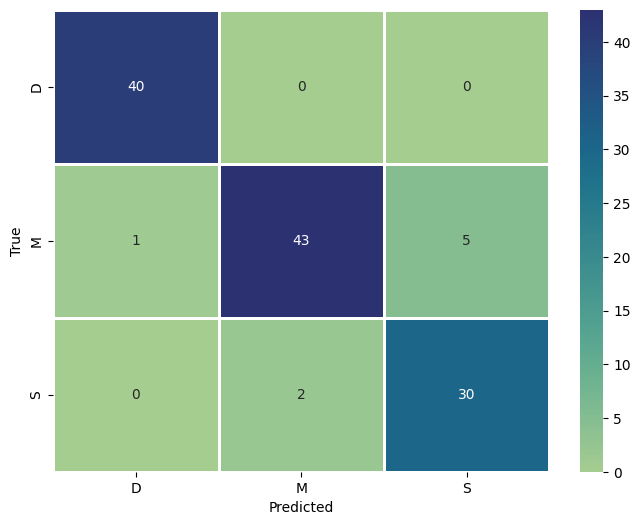

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

results = []
evaluate_model("RF", best_random_forest_model, results)
sklearn_eval = print_results(results)
rf_confusion_matrix = sklearn_eval["Confusion Matrix"].values[0]
confusion_matrix_df = pd.DataFrame(rf_confusion_matrix, index=["D", "M", "S"], columns=["D", "M", "S"])

fig, ax = plt.subplots(figsize=(8,6)) 
sns.heatmap(confusion_matrix_df, linewidths=1, annot=True, ax=ax, fmt='g', cmap="crest");
plt.ylabel('True')
plt.xlabel('Predicted');

### Đánh giá giá trị threshold khi dự đoán của model

In [27]:
best_model = best_random_forest_model

In [72]:
def get_labels(y_pred, y_pred_proba, threshold):
    label_result = []
    for index, predicted_class in enumerate(y_pred):
        prediction_probabilities = y_pred_proba[index]
        max_prob = prediction_probabilities.max()

        # Nếu max_prob < threshold thì dự đoán là dự đoán này chưa chắc chắn. 
        label_result.append(predicted_class if max_prob >= threshold else -1)
    return label_result


def calculate_f1_score_by_threshold(test_x, test_y):
    """
    Sẽ thực hiện việc tính toán F1 score cho từng class
    và F1 score trung bình dựa vào các ngưỡng threshold khác nhau
    """
    y_pred = best_model.predict(test_x)
    y_pred_proba = best_model.predict_proba(test_x)

    thresholds = list(np.arange(0, 1.05, 0.01))
    f1_score_results = []

    optimal_threshold = 0
    max_proba_all_classes = 0
    for threshold in thresholds:
        predictions = get_labels(y_pred, y_pred_proba, threshold)

        # Lưu f1 score của từng class và f1 score trung bình của tất cả các class
        f1_s = list(f1_score(test_y, predictions, labels=[0,1,2], average=None))

        # Tính trung bình theo weight các F1 score của các class
        f1_all_class = f1_score(test_y, predictions, labels=[0,1,2], average="weighted")
        if f1_all_class > max_proba_all_classes:
            max_proba_all_classes = f1_all_class
            optimal_threshold = threshold
        
        f1_s.append(f1_all_class)
        f1_score_results.append(f1_s)
    
    print("Optimal threshold for all classes: ", optimal_threshold)
    return thresholds, f1_score_results

Optimal threshold for all classes:  0.55


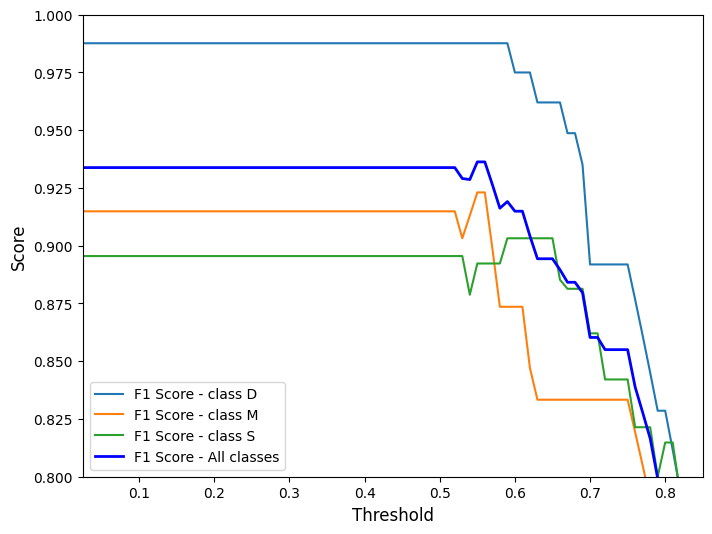

In [73]:
thresholds, f1_scores = calculate_f1_score_by_threshold(X_validation, y_validation)

first_class = [ el[0] for el in f1_scores ]
second_class = [ el[1] for el in f1_scores ]
third_class = [ el[2] for el in f1_scores ]
all_classes = [ el[3] for el in f1_scores ]

fig, ax = plt.subplots(figsize=(8,6))
plt.plot(thresholds, first_class, label = "F1 Score - class D")
plt.plot(thresholds, second_class, label = "F1 Score - class M")
plt.plot(thresholds, third_class, label = "F1 Score - class S")
plt.plot(thresholds, all_classes, label = "F1 Score - All classes", linewidth=2.0, color="blue")
plt.legend(loc = 'lower left')
plt.ylim([0.8, 1])
plt.xlim([0.025, 0.85])
plt.xlabel("Threshold", fontsize = 12)
plt.ylabel("Score", fontsize = 12)
plt.show()

Vậy để độ chính xác khi dự đoán một lớp là cao nhất, ta sẽ chọn `threshold là 0.55` (rơi vào vị trí độ chính xác trung bình khi dự đoán 1 class là cao nhất)